<a href="https://colab.research.google.com/github/Noor-Z1/Machine-Learning/blob/main/custom_dataset_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
!pip install scikit-learn

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler



# 1.2 Preprocessing the Sensors Data to a Pandas Dataframe

In [ ]:
# need to use the filenames for annotation and drop any NaN column


filenames = ['/content/train1_data_06_09_lying.csv',
             '/content/train1_data_06_09_stand.csv',
             '/content/train1_data_06_09_sitting.csv',
             '/content/train1_data_06_09_walk.csv',
             '/content/train2_data_06_09_lying.csv',
             '/content/train2_data_06_09_stand.csv',
             '/content/train2_data_06_09_sitting.csv',
             '/content/train2_data_06_09_walk.csv',
             ]


# Create a list of column names from 1 to 250
column_names = list(range(1, 251))

for fp in filenames:
    df = pd.read_csv(fp, sep=' ', names=column_names)
    df['activity'] = fp.split('_')[-1].split('.')[0]
    print(df)

    if fp == filenames[0]:
        data = df
    else:
        data = pd.concat([data, df], axis=0)

           1   2   3   4   5   6    7    8    9   10  ...  242  243  244  245  \
0          0 NaN NaN NaN   0  21   86   36  224  127  ...  NaN  NaN  NaN  NaN   
1        122 NaN NaN NaN  40  50   81   67 -100  370  ...  NaN  NaN  NaN  NaN   
2        243 NaN NaN NaN -27   1  110  111   38  166  ...  NaN  NaN  NaN  NaN   
3        364 NaN NaN NaN  22 -11  156  207   19  230  ...  NaN  NaN  NaN  NaN   
4        484 NaN NaN NaN  59  51  117  120   83  341  ...  NaN  NaN  NaN  NaN   
...      ...  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1355  176458 NaN NaN NaN -13  -2   41   10   69  264  ...  NaN  NaN  NaN  NaN   
1356  176579 NaN NaN NaN -18 -26   37   -1   84  267  ...  NaN  NaN  NaN  NaN   
1357  176700 NaN NaN NaN -19  13   58    5   80  267  ...  NaN  NaN  NaN  NaN   
1358  176820 NaN NaN NaN -20  30   41    4   68  261  ...  NaN  NaN  NaN  NaN   
1359  176942 NaN NaN NaN -26   3   35    0   64  267  ...  NaN  NaN  NaN  NaN   

      246  247  248  249  2

In [ ]:
data

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,activity
0,0,NaN,NaN,NaN,0,21,86,36.0,224.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
1,122,NaN,NaN,NaN,40,50,81,67.0,-100.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
2,243,NaN,NaN,NaN,-27,1,110,111.0,38.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
3,364,NaN,NaN,NaN,22,-11,156,207.0,19.0,230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
4,484,NaN,NaN,NaN,59,51,117,120.0,83.0,341.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,209509,NaN,NaN,NaN,-113,928,-1490,494.0,43.0,-278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
1336,211139,NaN,NaN,NaN,1804,2427,2557,442.0,-111.0,2494.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
1337,212767,NaN,NaN,NaN,-1090,-917,-309,-137.0,103.0,-424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
1338,214395,NaN,NaN,NaN,-518,-1315,1115,-292.0,163.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk


In [ ]:
# want to see NaN values for each column
nan_stats = data.isnull().sum().sort_values(ascending = False)/data.shape[0]

print(nan_stats[nan_stats > 0.05])

106    1.000000
163    1.000000
141    1.000000
142    1.000000
143    1.000000
         ...   
128    0.116376
127    0.116376
126    0.116376
120    0.116376
119    0.116376
Length: 198, dtype: float64


# 2. Data Preparation for Training

In [ ]:
# 4 5 6 HIP +
# 7 8 9 LUA^ +
# 10 11 12 RUA_ +
# 13 14 15 LH +
# 16 17 18 BACK +
# 19 20 21 RKN_ -
# 22 23 24 RWR +
# 37 38 39 - 49 IMU BACK acc including BACK MAGN +
# 56 57 58 RUA MAGN +
# 84 85 86 LUA MAGN +
# 97 LLA MAGN +
# 102 L SHOE +
# 127 128 129 R SHOE ANG_VEL +


reduced_columns = l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18, 19,20,21, 22,23,24, 56,57,58, 84,85,86, 97, 127]

df_filtered = data[data.columns[reduced_columns]]

# replace missing values with mean
df_filtered.fillna(df_filtered.mean(), inplace=True)
df_filtered["activity"] = data["activity"]

<ipython-input-204-3c06822fb93b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(df_filtered.mean(), inplace=True)
<ipython-input-204-3c06822fb93b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["activity"] = data["activity"]


In [ ]:
df_filtered.dropna(axis=1, inplace=True)

<ipython-input-205-e34d5b3fc52c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(axis=1, inplace=True)


In [ ]:
df_filtered

,5,6,7,8,9,10,11,12,13,14,...,20,21,22,23,24,25,86,87,128,activity
0,0,21,86,36.0,224.0,127.0,21,-40,-157,-247,...,-58,-11,447,-259,-224,-178,782.0,-338.0,0.000000,lying
1,40,50,81,67.0,-100.0,370.0,-68,61,-7,-122,...,28,4,490,5,414,76,783.0,-342.0,-1000.000000,lying
2,-27,1,110,111.0,38.0,166.0,227,85,-33,182,...,52,28,460,-141,1484,585,781.0,-338.0,0.000000,lying
3,22,-11,156,207.0,19.0,230.0,-415,-294,81,231,...,-38,-49,471,-197,374,305,782.0,-337.0,0.000000,lying
4,59,51,117,120.0,83.0,341.0,-412,63,-346,197,...,-36,-4,445,65,406,-51,780.0,-339.0,0.000000,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,-113,928,-1490,494.0,43.0,-278.0,-996,913,-545,345,...,4493,434,-2511,-3347,1549,226,-238.0,263.0,-2950.304459,walk
1336,1804,2427,2557,442.0,-111.0,2494.0,-1259,660,1495,-2512,...,1396,2357,2242,-4383,2294,1921,-385.0,81.0,-2950.304459,walk
1337,-1090,-917,-309,-137.0,103.0,-424.0,-695,685,-82,-235,...,-622,236,-1,-1187,780,-15,-444.0,88.0,-2950.304459,walk
1338,-518,-1315,1115,-292.0,163.0,5.0,378,-1759,606,-1008,...,-8020,-611,1475,2341,-773,-762,-113.0,428.0,-2950.304459,walk


In [ ]:
df_train = df_filtered
df_train

,5,6,7,8,9,10,11,12,13,14,...,20,21,22,23,24,25,86,87,128,activity
0,0,21,86,36.0,224.0,127.0,21,-40,-157,-247,...,-58,-11,447,-259,-224,-178,782.0,-338.0,0.000000,lying
1,40,50,81,67.0,-100.0,370.0,-68,61,-7,-122,...,28,4,490,5,414,76,783.0,-342.0,-1000.000000,lying
2,-27,1,110,111.0,38.0,166.0,227,85,-33,182,...,52,28,460,-141,1484,585,781.0,-338.0,0.000000,lying
3,22,-11,156,207.0,19.0,230.0,-415,-294,81,231,...,-38,-49,471,-197,374,305,782.0,-337.0,0.000000,lying
4,59,51,117,120.0,83.0,341.0,-412,63,-346,197,...,-36,-4,445,65,406,-51,780.0,-339.0,0.000000,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,-113,928,-1490,494.0,43.0,-278.0,-996,913,-545,345,...,4493,434,-2511,-3347,1549,226,-238.0,263.0,-2950.304459,walk
1336,1804,2427,2557,442.0,-111.0,2494.0,-1259,660,1495,-2512,...,1396,2357,2242,-4383,2294,1921,-385.0,81.0,-2950.304459,walk
1337,-1090,-917,-309,-137.0,103.0,-424.0,-695,685,-82,-235,...,-622,236,-1,-1187,780,-15,-444.0,88.0,-2950.304459,walk
1338,-518,-1315,1115,-292.0,163.0,5.0,378,-1759,606,-1008,...,-8020,-611,1475,2341,-773,-762,-113.0,428.0,-2950.304459,walk


In [ ]:
# repeat the same for the test data

filenames = ['/content/test1_data_06_09_lying.csv',
             '/content/test1_data_06_09_stand.csv',
             '/content/test1_data_06_09_sitting.csv',
             '/content/test1_data_06_09_walk.csv']


# Create a list of column names from 1 to 250
column_names = list(range(1, 251))

for fp in filenames:
    df = pd.read_csv(fp, sep=' ', names=column_names)
    df['activity'] = fp.split('_')[-1].split('.')[0]
    print(df)
    print('---')

    if fp == filenames[0]:
        data = df
    else:
        data = pd.concat([data, df], axis=0)

           1   2   3   4   5    6    7    8    9   10  ...  242  243  244  \
0          0 NaN NaN NaN  19  -88  112   90  110  239  ...  NaN  NaN  NaN   
1        482 NaN NaN NaN  34 -125  137  157  254  573  ...  NaN  NaN  NaN   
2        603 NaN NaN NaN  25  -32  134 -587  618  514  ...  NaN  NaN  NaN   
3        724 NaN NaN NaN  22   25  103 -621  559   60  ...  NaN  NaN  NaN   
4        845 NaN NaN NaN -30   90  129 -520  136  107  ...  NaN  NaN  NaN   
...      ...  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1955  264181 NaN NaN NaN -19    6   40   37  -32  234  ...  NaN  NaN  NaN   
1956  264302 NaN NaN NaN -12  -21   45   37  -35  244  ...  NaN  NaN  NaN   
1957  264424 NaN NaN NaN -10    6   43   29  -27  243  ...  NaN  NaN  NaN   
1958  264547 NaN NaN NaN  17    0   37   38  -26  218  ...  NaN  NaN  NaN   
1959  264668 NaN NaN NaN -36   11   52   29  -27  245  ...  NaN  NaN  NaN   

      245  246  247  248  249  250  activity  
0     NaN  NaN  NaN  NaN  Na

In [ ]:
data

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,activity
0,0,NaN,NaN,NaN,19,-88,112,90,110,239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
1,482,NaN,NaN,NaN,34,-125,137,157,254,573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
2,603,NaN,NaN,NaN,25,-32,134,-587,618,514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
3,724,NaN,NaN,NaN,22,25,103,-621,559,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
4,845,NaN,NaN,NaN,-30,90,129,-520,136,107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,240600,NaN,NaN,NaN,333,2001,-321,599,397,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
1576,240721,NaN,NaN,NaN,2075,2062,334,-78,1042,-316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
1577,240842,NaN,NaN,NaN,1548,33,44,90,-448,-156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
1578,240962,NaN,NaN,NaN,-81,-1213,-103,-601,-1119,-185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk


In [ ]:
# 4 5 6 HIP +
# 7 8 9 LUA^ +
# 10 11 12 RUA_ +
# 13 14 15 LH +
# 16 17 18 BACK +
# 19 20 21 RKN_ -
# 22 23 24 RWR +
# 37 38 39 - 49 IMU BACK acc including BACK MAGN +
# 56 57 58 RUA MAGN +
# 84 85 86 LUA MAGN +
# 97 LLA MAGN +
# 102 L SHOE +
# 127 128 129 R SHOE ANG_VEL +


reduced_columns = l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18, 19,20,21, 22,23,24, 56,57,58, 84,85,86, 97, 127]

df_filtered_test = data[data.columns[reduced_columns]]

# replace missing values with mean
df_filtered_test.fillna(df_filtered_test.mean(), inplace=True)
df_filtered_test["activity"] = data["activity"]

<ipython-input-210-89a4846273f5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_test.fillna(df_filtered_test.mean(), inplace=True)
<ipython-input-210-89a4846273f5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_test["activity"] = data["activity"]


In [ ]:
df_filtered_test.dropna(axis=1, inplace=True)

<ipython-input-211-fc4e15a294ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_test.dropna(axis=1, inplace=True)


In [ ]:
df_test = df_filtered_test

df_test

,5,6,7,8,9,10,11,12,13,14,...,20,21,22,23,24,25,86,87,128,activity
0,19,-88,112,90,110,239,243,616,-149,-1051,...,4,-87,452,806,1967,-1048,214,117,0,lying
1,34,-125,137,157,254,573,10,-415,-258,61,...,-18,-102,444,-913,-779,-7,267,83,0,lying
2,25,-32,134,-587,618,514,126,-791,-564,-88,...,-24,-64,471,-779,-395,-371,299,76,0,lying
3,22,25,103,-621,559,60,-284,-623,-401,-409,...,-37,3,477,-881,-252,-310,309,74,0,lying
4,-30,90,129,-520,136,107,-439,-356,-47,-352,...,12,98,495,-786,93,10,309,70,0,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,333,2001,-321,599,397,341,600,531,1782,649,...,3497,-4813,-635,2058,567,3802,835,-417,3000,walk
1576,2075,2062,334,-78,1042,-316,2328,-41,1079,-720,...,813,-1772,1077,2072,48,1957,844,-391,3000,walk
1577,1548,33,44,90,-448,-156,72,-818,-691,-433,...,-76,601,329,354,-487,197,844,-382,4000,walk
1578,-81,-1213,-103,-601,-1119,-185,-87,-373,-228,-109,...,-701,964,540,-552,173,284,822,-303,0,walk


In [ ]:
df_train["activity"].value_counts()

activity
stand      3570
lying      2959
sitting    2679
walk       2315
Name: count, dtype: int64

In [ ]:
df_test["activity"].value_counts()

activity
stand      2540
lying      1960
sitting    1820
walk       1580
Name: count, dtype: int64

In [ ]:
#map the activities
df_train["activity"] = df_train["activity"].map({"sitting": 0, "lying": 1, "stand": 2, "walk": 3})
df_test["activity"] = df_test["activity"].map({"sitting": 0, "lying": 1, "stand": 2, "walk": 3})

<ipython-input-215-b7d57d6ebc33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["activity"] = df_train["activity"].map({"sitting": 0, "lying": 1, "stand": 2, "walk": 3})
<ipython-input-215-b7d57d6ebc33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["activity"] = df_test["activity"].map({"sitting": 0, "lying": 1, "stand": 2, "walk": 3})


In [ ]:
from scipy.signal import butter, filtfilt

# Separate features and target from the training set
X_train = np.array(df_train.drop(["activity"], axis=1))
y_train = np.array(df_train["activity"]).astype('int')

# Separate features and target from the test set
X_test = np.array(df_test.drop(["activity"], axis=1))
y_test = np.array(df_test["activity"]).astype('int')

# Scale the features using RobustScaler


# Function to apply low-pass filter
def low_pass_filter(signal, cutoff_freq, sample_rate):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Apply low-pass filter to all features
cutoff_freq = 0.9  # Define your cutoff frequency
sample_rate = 1000 / 122  # 1 sample per 482 milliseconds

X_train_filtered = np.apply_along_axis(low_pass_filter, 0, X_train, cutoff_freq, sample_rate)
X_test_filtered = np.apply_along_axis(low_pass_filter, 0, X_test, cutoff_freq, sample_rate)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

In [ ]:
X = np.array(df_train.drop(["activity"], axis=1))
y = np.array(df_train["activity"])
y = y.astype('int')

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X)
y_train = y

X_test = np.array(df_test.drop(["activity"], axis=1))
y_test = np.array(df_test["activity"])
y_test = y_test.astype('int')

X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# define grid search and nested cross validation
grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [200, 300, 400, 500, 600, 700],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']

    }

# Create a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=700, class_weight='balanced_subsample', criterion='gini', min_samples_leaf=2, min_samples_split=2)


rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1820
           1       0.99      0.90      0.94      1960
           2       0.92      0.71      0.80      2540
           3       0.91      1.00      0.95      1580

    accuracy                           0.87      7900
   macro avg       0.88      0.89      0.88      7900
weighted avg       0.89      0.87      0.87      7900



In [ ]:
# Random Forest for multi-class classification using one-vs-one
from sklearn.multiclass import OneVsRestClassifier


# define ovo strategy
ovo = OneVsRestClassifier(rf_model)
# fit model
ovo.fit(X_train_scaled, y_train)
# make predictions
yhat = ovo.predict(X_test_scaled)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print(classification_report(y_test, yhat))

0.8330379746835443
              precision    recall  f1-score   support

           0       0.65      0.90      0.75      1820
           1       0.94      0.89      0.91      1960
           2       0.92      0.64      0.75      2540
           3       0.91      1.00      0.95      1580

    accuracy                           0.83      7900
   macro avg       0.85      0.86      0.84      7900
weighted avg       0.86      0.83      0.83      7900



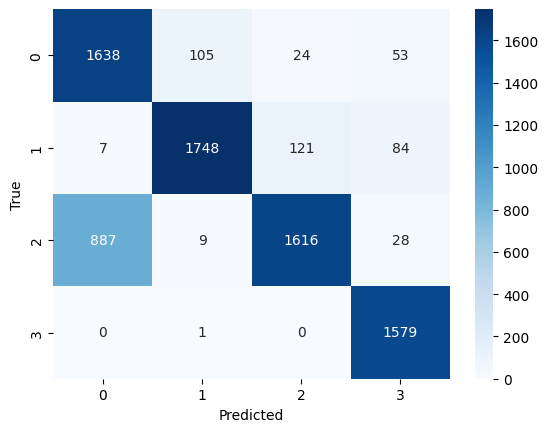

In [ ]:
#print confusion matrix from seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

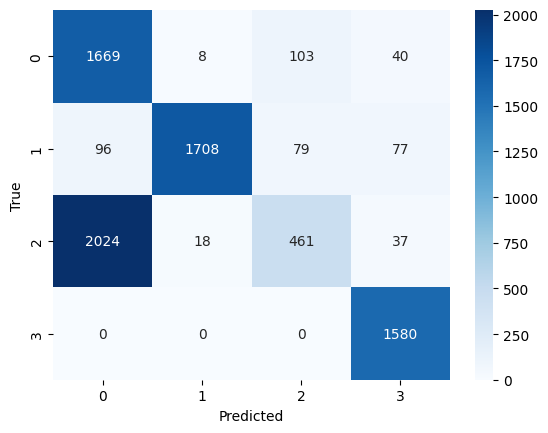

In [ ]:
#print confusion matrix from seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# repeat the same for the test data

filenames = ['/content/test2_data_06_09_lying.csv',
             '/content/test2_data_06_09_stand.csv',
             '/content/test2_data_06_09_sitting.csv',
             '/content/test2_data_06_09_walk.csv']


# Create a list of column names from 1 to 250
column_names = list(range(1, 251))

for fp in filenames:
    df = pd.read_csv(fp, sep=' ', names=column_names)
    df['activity'] = fp.split('_')[-1].split('.')[0]
    print(df)
    print('---')

    if fp == filenames[0]:
        data = df
    else:
        data = pd.concat([data, df], axis=0)

          1   2   3   4    5    6    7      8      9     10  ...  242  243  \
0         0 NaN NaN NaN   49  -25   82  -60.0  -69.0  444.0  ...  NaN  NaN   
1       121 NaN NaN NaN   -7  -67  127   43.0  -40.0  537.0  ...  NaN  NaN   
2       241 NaN NaN NaN    9   98  207   61.0  310.0  303.0  ...  NaN  NaN   
3       362 NaN NaN NaN   30  -31  139   47.0  -17.0  541.0  ...  NaN  NaN   
4       482 NaN NaN NaN  -26  173   19  -24.0  110.0  408.0  ...  NaN  NaN   
..      ...  ..  ..  ..  ...  ...  ...    ...    ...    ...  ...  ...  ...   
800  114397 NaN NaN NaN -222  223  324   89.0  287.0 -106.0  ...  NaN  NaN   
801  114517 NaN NaN NaN   29  -24   71 -137.0   -8.0  514.0  ...  NaN  NaN   
802  114638 NaN NaN NaN   50  124  134 -259.0  192.0  247.0  ...  NaN  NaN   
803  114758 NaN NaN NaN  135  -19  -52 -207.0  324.0  172.0  ...  NaN  NaN   
804  114879 NaN NaN NaN  -48   38  124  573.0  249.0   28.0  ...  NaN  NaN   

     244  245  246  247  248  249  250  activity  
0    NaN  Na

In [ ]:
data

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,activity
0,0,NaN,NaN,NaN,49.0,-25.0,82.0,-60.0,-69.0,444.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
1,121,NaN,NaN,NaN,-7.0,-67.0,127.0,43.0,-40.0,537.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
2,241,NaN,NaN,NaN,9.0,98.0,207.0,61.0,310.0,303.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
3,362,NaN,NaN,NaN,30.0,-31.0,139.0,47.0,-17.0,541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
4,482,NaN,NaN,NaN,-26.0,173.0,19.0,-24.0,110.0,408.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,404214,NaN,NaN,NaN,972.0,-181.0,9.0,301.0,-286.0,241.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
3046,404335,NaN,NaN,NaN,903.0,-197.0,56.0,644.0,-86.0,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
3047,404456,NaN,NaN,NaN,826.0,-315.0,88.0,-171.0,-55.0,154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk
3048,404576,NaN,NaN,NaN,869.0,-513.0,33.0,419.0,39.0,190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,walk


In [ ]:
# 4 5 6 HIP +
# 7 8 9 LUA^ +
# 10 11 12 RUA_ +
# 13 14 15 LH +
# 16 17 18 BACK +
# 19 20 21 RKN_ -
# 22 23 24 RWR +
# 37 38 39 - 49 IMU BACK acc including BACK MAGN +
# 56 57 58 RUA MAGN +
# 84 85 86 LUA MAGN +
# 97 LLA MAGN +
# 102 L SHOE +
# 127 128 129 R SHOE ANG_VEL +


reduced_columns = l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18, 19,20,21, 22,23,24, 56,57,58, 84,85,86, 97, 127]

df_filtered_val = data[data.columns[reduced_columns]]

# replace missing values with mean
df_filtered_val.fillna(df_filtered_val.mean(), inplace=True)
df_filtered_val["activity"] = data["activity"]

<ipython-input-224-63b60daf5f5a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_val.fillna(df_filtered_val.mean(), inplace=True)
<ipython-input-224-63b60daf5f5a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_val["activity"] = data["activity"]


In [ ]:
df_filtered_val.dropna(axis=1, inplace=True)

<ipython-input-225-4905157fe7e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_val.dropna(axis=1, inplace=True)


In [ ]:
df_val = df_filtered_val

df_val

,5,6,7,8,9,10,11,12,13,14,...,20,21,22,23,24,25,86,87,128,activity
0,49.0,-25.0,82.0,-60.0,-69.0,444.0,104,-144,-75,103,...,-172,-13,494,164,-147,71,809.0,-141.0,-447.097124,lying
1,-7.0,-67.0,127.0,43.0,-40.0,537.0,-68,-175,-232,-112,...,-117,-80,482,312,-112,80,807.0,-136.0,-447.097124,lying
2,9.0,98.0,207.0,61.0,310.0,303.0,45,-76,-23,91,...,-54,-6,515,-20,22,127,808.0,-131.0,-447.097124,lying
3,30.0,-31.0,139.0,47.0,-17.0,541.0,-35,-152,-151,28,...,112,201,338,-80,-195,-27,808.0,-128.0,-447.097124,lying
4,-26.0,173.0,19.0,-24.0,110.0,408.0,-88,101,-90,-101,...,-36,-17,441,-64,-10,24,809.0,-124.0,-447.097124,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,972.0,-181.0,9.0,301.0,-286.0,241.0,278,184,-23,-242,...,-87,10,480,698,120,267,-720.0,-517.0,-447.097124,walk
3046,903.0,-197.0,56.0,644.0,-86.0,91.0,193,105,-119,-119,...,-24,16,475,524,-58,207,-710.0,-523.0,-447.097124,walk
3047,826.0,-315.0,88.0,-171.0,-55.0,154.0,77,41,3,-4,...,-35,61,480,157,-77,301,-711.0,-528.0,-447.097124,walk
3048,869.0,-513.0,33.0,419.0,39.0,190.0,-81,-54,18,170,...,25,-17,489,-124,-143,301,-736.0,-523.0,-447.097124,walk


In [ ]:
df_val["activity"] = df_val["activity"].map({"sitting": 0, "lying": 1, "stand": 2, "walk": 3})

<ipython-input-227-28ccc3206bc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["activity"] = df_val["activity"].map({"sitting": 0, "lying": 1, "stand": 2, "walk": 3})


In [ ]:
from scipy.signal import butter, filtfilt


# Separate features and target from the test set
X_test = np.array(df_val.drop(["activity"], axis=1))
y_test = np.array(df_val["activity"]).astype('int')

# # Scale the features using RobustScaler


# Function to apply low-pass filter
def low_pass_filter(signal, cutoff_freq, sample_rate):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(N=5, Wn=normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Apply low-pass filter to all features
cutoff_freq = 0.9  # Define your cutoff frequency
sample_rate = 1000 / 122  # 1 sample per 482 milliseconds

X_test_filtered = np.apply_along_axis(low_pass_filter, 0, X_test, cutoff_freq, sample_rate)
X_test_scaled = scaler.transform(X_test_filtered)

In [ ]:
yhat = ovo.predict(X_test_scaled)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print(classification_report(y_test, yhat))

0.9373311723392761
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2530
           1       0.81      0.65      0.72       805
           2       0.95      0.94      0.94      2870
           3       0.94      0.99      0.97      3050

    accuracy                           0.94      9255
   macro avg       0.91      0.89      0.90      9255
weighted avg       0.94      0.94      0.94      9255



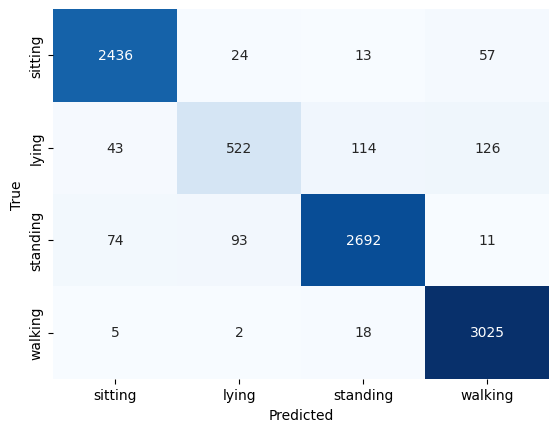

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# can I provide names for labels here:

label_names = {0:"sitting", 1:"lying", 2: "standing", 3:"walking"}

cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_names.values(), yticklabels=label_names.values(), cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

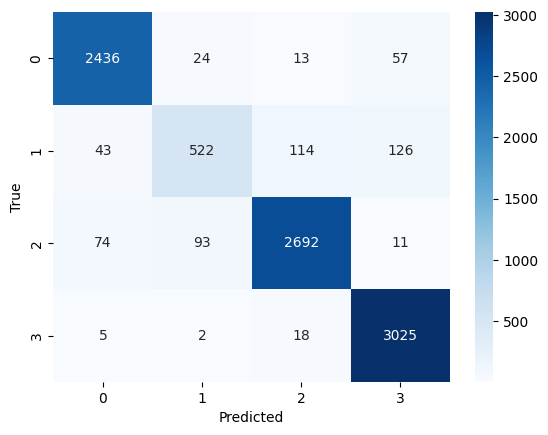

In [ ]:
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#save model and scaler:
import joblib

joblib.dump(scaler, 'scaler5.pkl')
joblib.dump(ovo, 'baris_personalized_classifier5.pkl')
reduced_columns = l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18, 19,20,21, 22,23,24, 56,57,58, 84,85,86, 97, 127]


In [ ]:
import pickle

with open('baris_personalized_classifier2.pkl', 'wb') as f:
    pickle.dump(ovo, f)

with open('scaler2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
# print pickle version
import pickle
pickle_format_version = pickle.format_version
print(pickle_format_version)

4.0
